# A analysis framework for diabetes complecation predictions.

## Case 1: Predict the cardiovascular disease for diabetes patients

In [1]:
from DiabetesComplecationPrediction.datasets import *
from DiabetesComplecationPrediction.preprocessing import *
from DiabetesComplecationPrediction.trained_model import SVMModel, RFModel

### Load the sample data set

In [2]:
df_cvd = diabetes_cvd_risk()

In [3]:
df_cvd.head()

,Age,Sex,Body.height..at.0M,Waist.circumstances.at.0M,Duration.of.T2DM,Smoking.habit,Drinking.habit,History.of.complications,History.of.hypertension,History.of.dyslipidemia,...,Urinary.sugar.at.3M,Urinary.sugar.at.12M,Urinary.albumin.creatinine.ratio.at.0M,Urinary.albumin.creatinine.ratio.at.3M,Urinary.albumin.creatinine.ratio.at.12M,eGFR.at.0M,eGFR.at.1M,eGFR.at.3M,eGFR.at.12M,Cardiovascular Risk
0,61,1,170.0,101.000,72.0,0,0,1,1,1,...,0,0,53.300,94.218,6.400,55.940643,52.670513,50.686818,61.643003,1
1,42,1,184.0,99.532,36.0,2,0,1,0,1,...,4,3,84.301,76.349,58.541,98.878513,96.060985,96.013865,89.393232,0
2,64,1,169.0,94.627,168.0,2,0,1,0,1,...,4,0,14.497,13.418,12.110,83.486588,83.701169,80.666781,79.474729,0
3,57,1,168.5,96.122,144.0,2,1,1,1,1,...,0,0,19.916,19.455,16.512,85.148398,85.273085,83.015438,79.775872,1
4,63,2,151.0,88.500,72.0,1,0,1,1,1,...,0,0,30.000,27.100,56.600,77.754106,87.433453,89.274571,83.961202,0


In [4]:
df_cvd.describe()

,Age,Sex,Body.height..at.0M,Waist.circumstances.at.0M,Duration.of.T2DM,Smoking.habit,Drinking.habit,History.of.complications,History.of.hypertension,History.of.dyslipidemia,...,Urinary.sugar.at.3M,Urinary.sugar.at.12M,Urinary.albumin.creatinine.ratio.at.0M,Urinary.albumin.creatinine.ratio.at.3M,Urinary.albumin.creatinine.ratio.at.12M,eGFR.at.0M,eGFR.at.1M,eGFR.at.3M,eGFR.at.12M,Cardiovascular Risk
count,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,...,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000
mean,63.796915,1.330334,162.565580,88.011758,105.719280,0.746787,0.493573,0.872751,0.600257,0.633676,...,0.580977,0.624679,85.162195,80.455969,97.047365,78.972554,77.035365,76.032183,75.176731,0.096401
std,11.907943,0.470636,9.769645,10.002808,77.806204,0.839131,0.500280,0.333466,0.490161,0.482109,...,1.223640,1.252234,216.727890,191.680417,274.097911,19.241486,18.561820,18.538022,18.020558,0.295330
min,27.000000,1.000000,135.400000,38.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,16.761851,16.245185,15.499500,11.595636,0.000000
25%,56.000000,1.000000,155.000000,82.321250,48.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,11.062750,12.600000,10.824000,66.626131,64.560632,64.152881,63.860296,0.000000
50%,64.000000,1.000000,164.000000,87.500000,96.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,24.308000,30.115500,25.900000,78.292170,75.956908,75.124895,75.320527,0.000000
75%,73.000000,2.000000,170.000000,93.485000,135.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,64.468250,67.487425,70.555000,90.290442,89.003222,86.412704,85.002063,0.000000
max,98.000000,2.000000,188.000000,187.000000,480.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,3451.000000,3525.300000,3677.700000,155.449823,158.016961,153.986513,140.813732,1.000000


In [5]:
df_cvd.dtypes

Age                            int64
Sex                            int64
Body.height..at.0M           float64
Waist.circumstances.at.0M    float64
Duration.of.T2DM             float64
                              ...   
eGFR.at.0M                   float64
eGFR.at.1M                   float64
eGFR.at.3M                   float64
eGFR.at.12M                  float64
Cardiovascular Risk            int64
Length: 165, dtype: object

### Check for missing values

In [6]:
df_cvd.isnull().sum()

Age                          0
Sex                          0
Body.height..at.0M           0
Waist.circumstances.at.0M    0
Duration.of.T2DM             0
                            ..
eGFR.at.0M                   0
eGFR.at.1M                   0
eGFR.at.3M                   0
eGFR.at.12M                  0
Cardiovascular Risk          0
Length: 165, dtype: int64

### Data preprocessing

#### Plot the correlation heatmap for the whole dataset

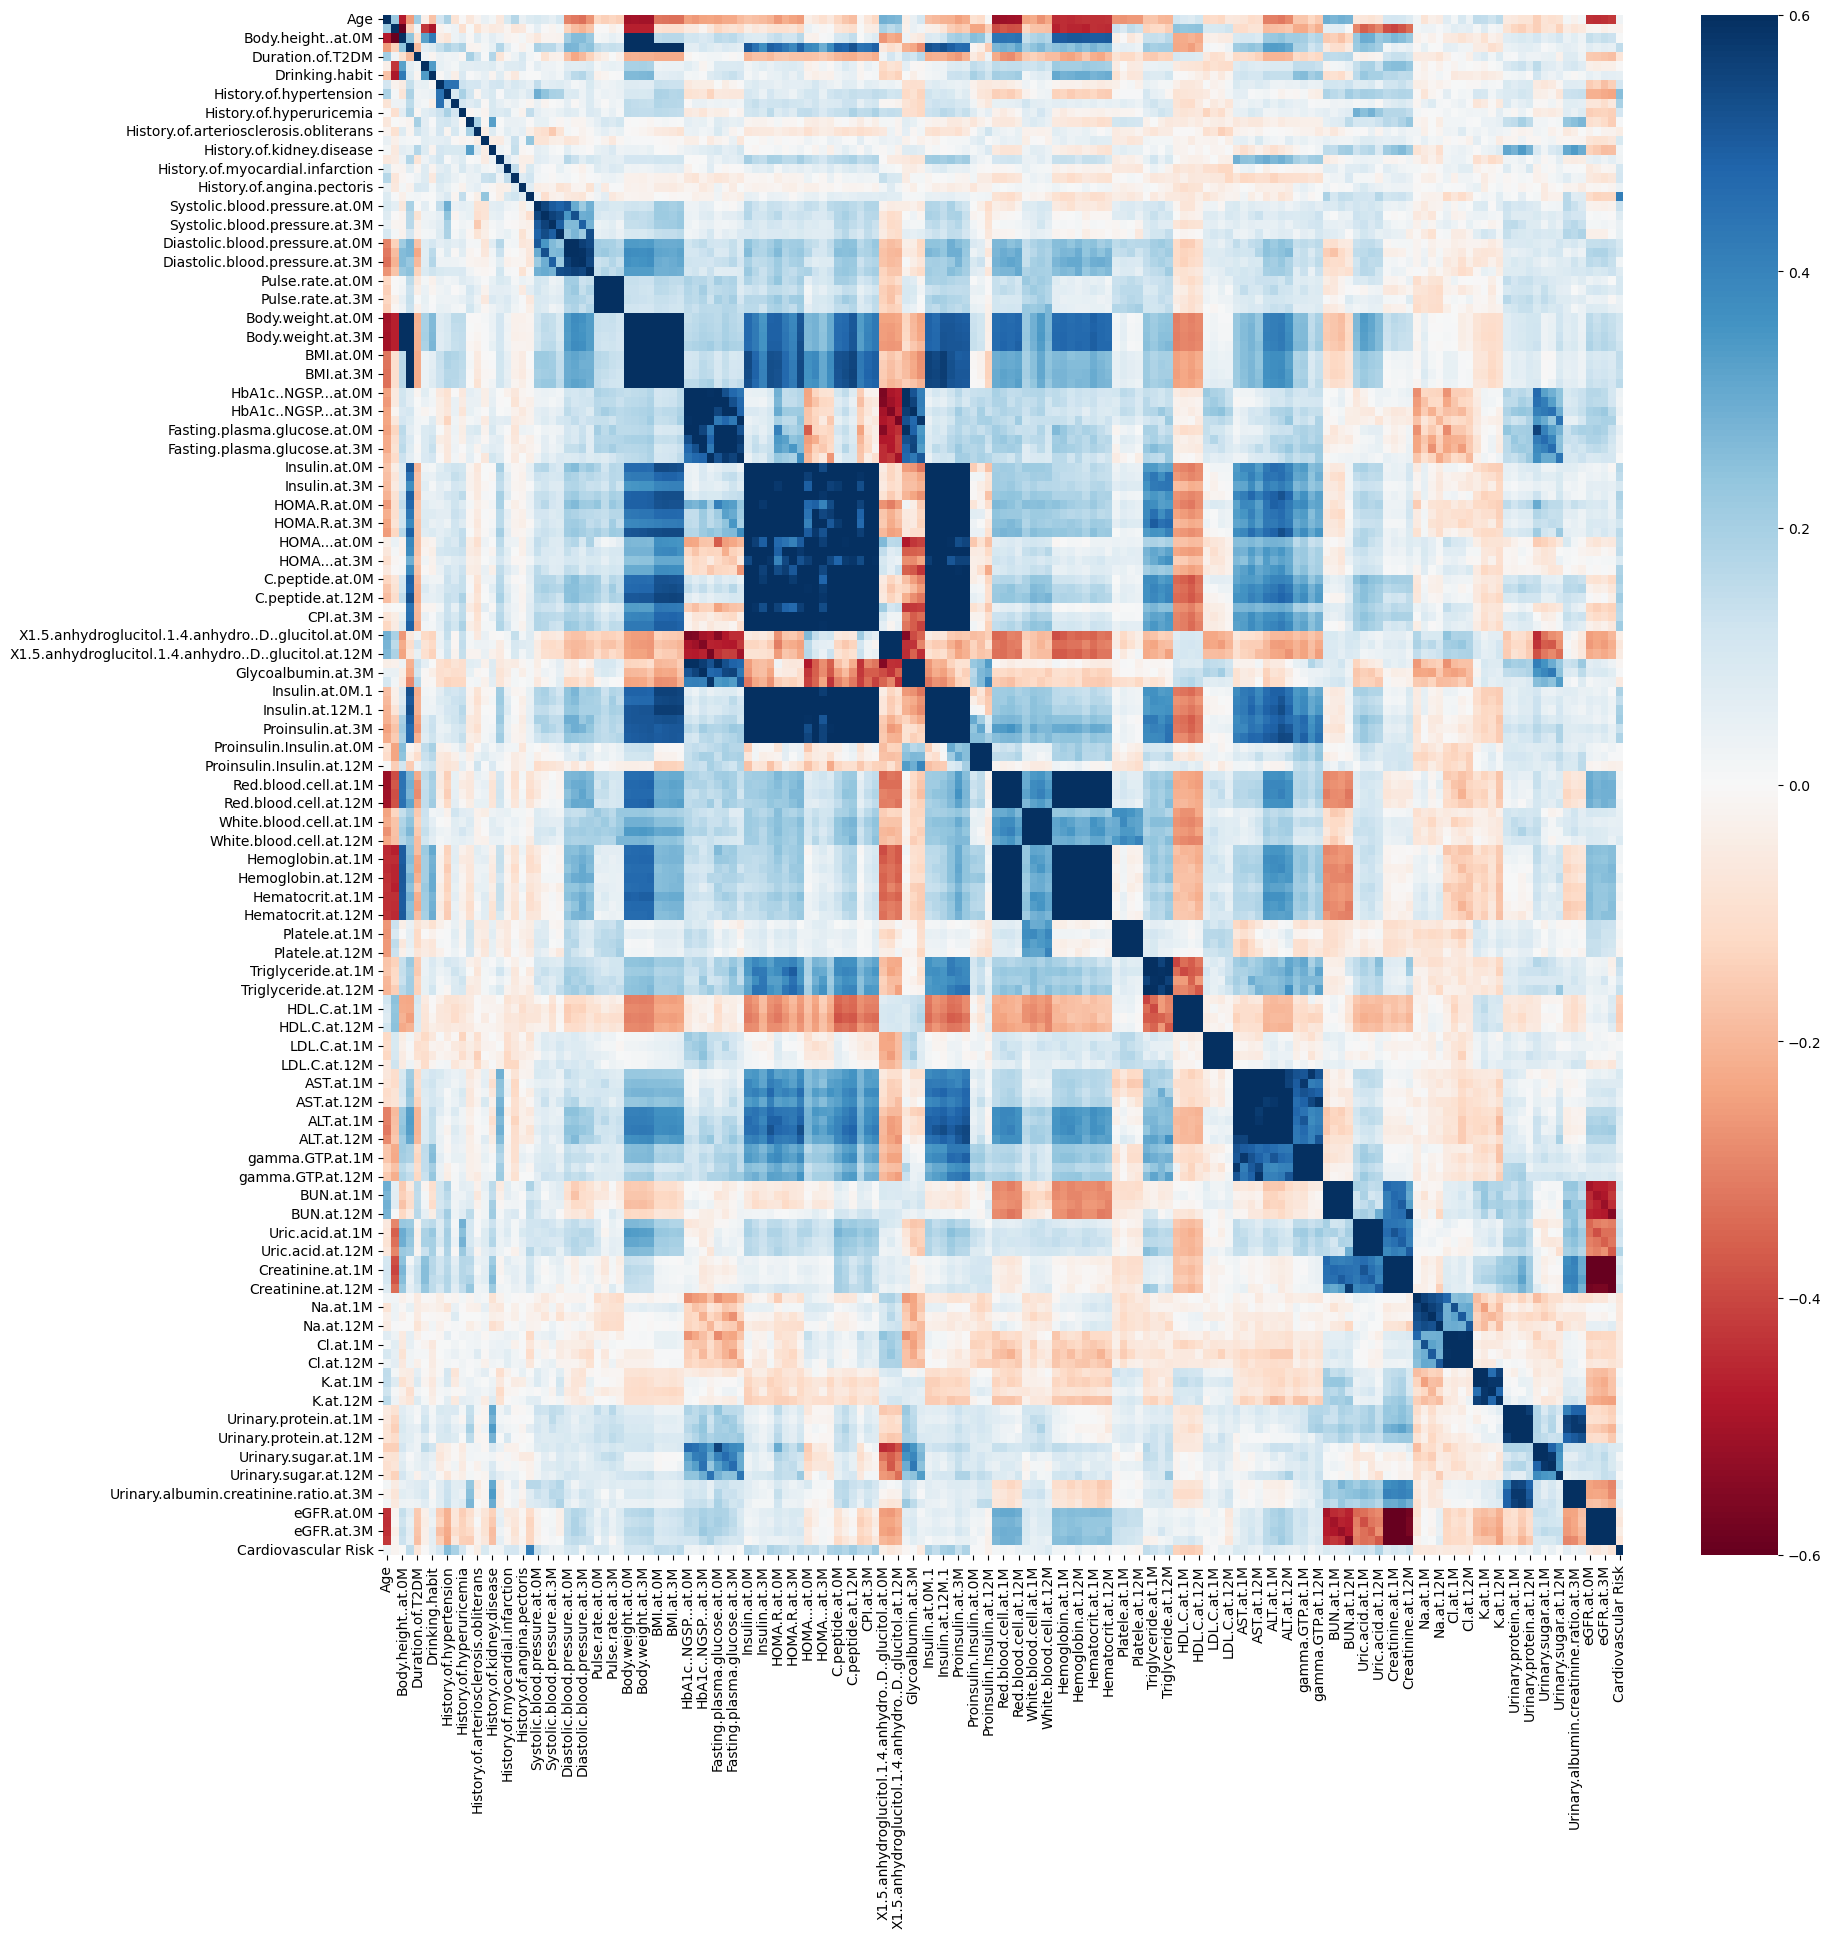

In [7]:
cor_heatmap(df_cvd)

#### Select the most related 20 features for cardiovascular risk

In [3]:
feature = Feature(df_cvd, 'Cardiovascular Risk')

In [5]:
most_related_20 = feature.most_correlated()
most_related_20

Index(['Cardiovascular Risk', 'History.of.heart.failure',
       'History.of.hypertension', 'C.peptide.at.12M', 'Proinsulin.at.0M',
       'CPI.at.12M', 'C.peptide.at.0M', 'Insulin.at.12M.1',
       'History.of.dyslipidemia', 'Insulin.at.12M', 'Insulin.at.0M.1',
       'HOMA...at.12M', 'Proinsulin.at.12M', 'Uric.acid.at.12M',
       'C.peptide.at.3M', 'Insulin.at.0M', 'HOMA.R.at.0M', 'CPI.at.0M',
       'CPI.at.3M', 'HOMA.R.at.12M', 'BMI.at.12M'],
      dtype='object')

#### Generate the feature list

In [ ]:
cvd_feature_list = feature.feature_list()
cvd_feature_list

['History.of.heart.failure',
 'History.of.hypertension',
 'C.peptide.at.12M',
 'History.of.dyslipidemia',
 'Insulin.at.12M.1',
 'C.peptide.at.0M',
 'CPI.at.12M',
 'Proinsulin.at.0M',
 'Insulin.at.0M.1',
 'Insulin.at.12M',
 'Insulin.at.1M',
 'HOMA...at.12M',
 'C.peptide.at.3M',
 'HOMA...at.1M',
 'CPI.at.0M',
 'Proinsulin.at.12M',
 'HOMA.R.at.12M',
 'BMI.at.12M',
 'HOMA.R.at.1M',
 'Uric.acid.at.12M']

#### Check the correlation coefficients

In [6]:
most_20_corr = feature.view_correlations()
most_20_corr

,Cardiovascular Risk,History.of.heart.failure,History.of.hypertension,C.peptide.at.12M,Proinsulin.at.0M,CPI.at.12M,C.peptide.at.0M,Insulin.at.12M.1,History.of.dyslipidemia,Insulin.at.12M,...,HOMA...at.12M,Proinsulin.at.12M,Uric.acid.at.12M,C.peptide.at.3M,Insulin.at.0M,HOMA.R.at.0M,CPI.at.0M,CPI.at.3M,HOMA.R.at.12M,BMI.at.12M
Cardiovascular Risk,1.000000,0.414443,0.257657,0.212939,0.212599,0.211672,0.198902,0.197215,0.194108,0.191973,...,0.184017,0.183669,0.178938,0.174923,0.171460,0.169317,0.167569,0.163184,0.162924,0.162822
History.of.heart.failure,0.414443,1.000000,0.090729,0.060220,0.058420,0.065981,0.058167,0.055181,-0.017489,0.043905,...,0.066021,0.042101,0.173420,0.050213,0.052910,0.039572,0.070587,0.074276,0.025950,-0.009372
History.of.hypertension,0.257657,0.090729,1.000000,0.142556,0.098335,0.151994,0.134012,0.109663,0.098431,0.109238,...,0.120368,0.078248,0.185598,0.123108,0.104126,0.068848,0.135793,0.134586,0.081575,0.176937
C.peptide.at.12M,0.212939,0.060220,0.142556,1.000000,0.852984,0.947865,0.853761,0.938532,0.129557,0.903948,...,0.775745,0.881713,0.197428,0.897868,0.827431,0.751486,0.786419,0.873412,0.847221,0.551746
Proinsulin.at.0M,0.212599,0.058420,0.098335,0.852984,1.000000,0.826187,0.803928,0.843397,0.123844,0.809706,...,0.713068,0.869141,0.202098,0.793508,0.813090,0.770940,0.697799,0.745785,0.756944,0.519928
CPI.at.12M,0.211672,0.065981,0.151994,0.947865,0.826187,1.000000,0.818123,0.892494,0.116076,0.857884,...,0.886920,0.811413,0.178131,0.850499,0.792502,0.663535,0.817847,0.868498,0.733865,0.484852
C.peptide.at.0M,0.198902,0.058167,0.134012,0.853761,0.803928,0.818123,1.000000,0.797844,0.091996,0.750329,...,0.652203,0.716610,0.237006,0.856419,0.849103,0.787061,0.884290,0.814856,0.691805,0.515424
Insulin.at.12M.1,0.197215,0.055181,0.109663,0.938532,0.843397,0.892494,0.797844,1.000000,0.120095,0.973934,...,0.806431,0.857284,0.157648,0.847641,0.847377,0.778791,0.732065,0.818643,0.923461,0.566123
History.of.dyslipidemia,0.194108,-0.017489,0.098431,0.129557,0.123844,0.116076,0.091996,0.120095,1.000000,0.122594,...,0.087796,0.102654,-0.007990,0.128364,0.122197,0.124449,0.055964,0.100785,0.116085,0.166264
Insulin.at.12M,0.191973,0.043905,0.109238,0.903948,0.809706,0.857884,0.750329,0.973934,0.122594,1.000000,...,0.806431,0.823523,0.151850,0.806976,0.814366,0.756052,0.680032,0.773647,0.949367,0.530655


#### Plot the correlation heatmap for the most related features

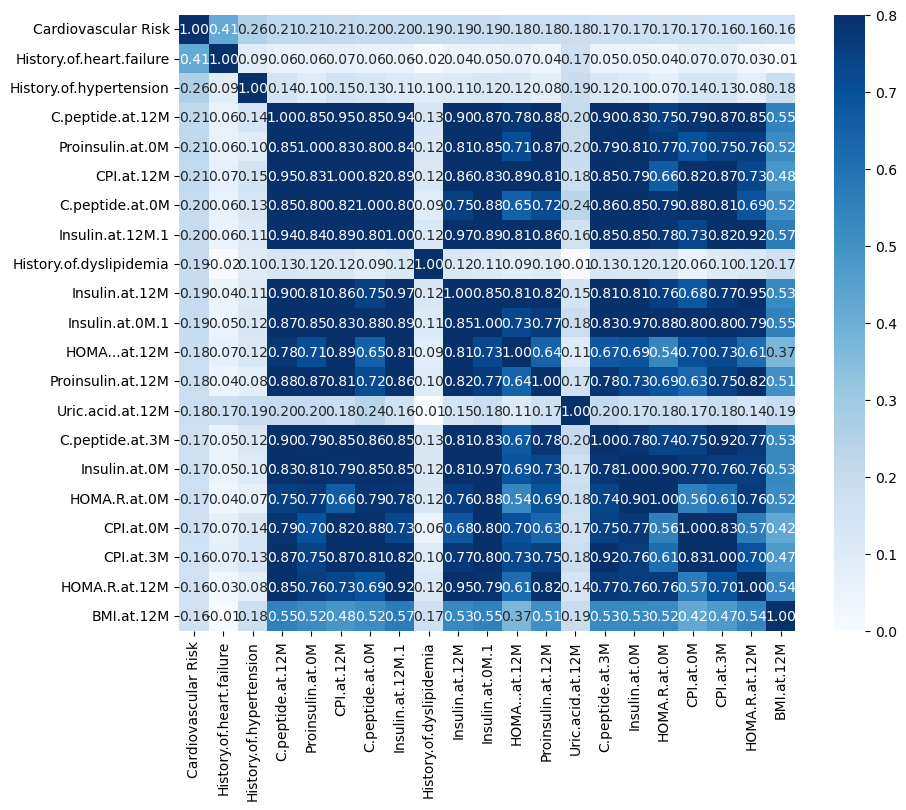

In [7]:
feature.most_related_heatmap()

#### Calculate the feature skewness

In [11]:
skewness_values=skewness(df_cvd)
skewness_values

,skewness
gamma.GTP.at.3M,12.355320
HOMA...at.3M,10.816910
Urinary.albumin.creatinine.ratio.at.3M,9.350162
Insulin.at.3M,8.730913
Urinary.albumin.creatinine.ratio.at.0M,8.351861
...,...
History.of.dyslipidemia,-0.554903
Na.at.1M,-0.883758
Na.at.12M,-0.976869
Na.at.3M,-1.140206


#### Transform skewed data to follow a normal distribution

In [4]:
df_cvd_normal = box_cox(df_cvd)

d:\downloads\anaconda\envs\ml\lib\site-packages\scipy\stats\_stats_py.py:4464: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  warnings.warn(stats.NearConstantInputWarning(msg))
d:\downloads\anaconda\envs\ml\lib\site-packages\scipy\stats\_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [13]:
skewness_after = skewness(df_cvd_normal)
skewness_after

,skewness
History.of.heart.failure,7.251879
History.of.atrial.fibrillation,6.343966
History.of.myocardial.infarction,5.837410
History.of.angina.pectoris,4.621190
History.of.cerebral.infarction,3.515417
...,...
History.of.hypertension,-0.409342
Na.at.0M,-0.409845
Cl.at.12M,-0.449961
History.of.dyslipidemia,-0.554903


### Encode the target column

In [ ]:
df_cvd_normal = encode_categ(df_cvd_normal, 'Cardiovascular Risk')

### Fit the SVM model

In [8]:
svm_cvd = SVMModel(df_cvd_normal,
                   cvd_feature_list,
                   'Cardiovascular Risk')

In [9]:
cvd_svm_model = svm_cvd.trained_model()

### Evaluate the SVM model

In [10]:
svm_cvd.model_accuracy()

90.5982905982906

In [10]:
svm_cvd.roc()

0.8892857142857143

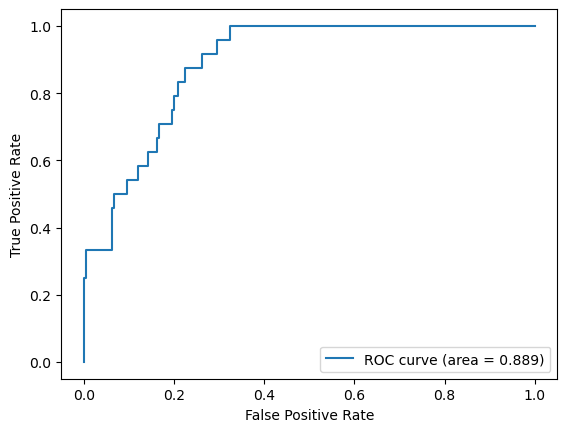

In [11]:
svm_cvd.roc_plot()

### Fit the random forest model

In [8]:
rf_cvd = RFModel(df_cvd_normal,
                cvd_feature_list,
                'Cardiovascular Risk')

In [9]:
rf_svm_model = rf_cvd.trained_model()

### Evaluate the random forest model

In [10]:
rf_cvd.model_accuracy()

89.74358974358975

In [11]:
rf_cvd.roc()

0.8102810650887574

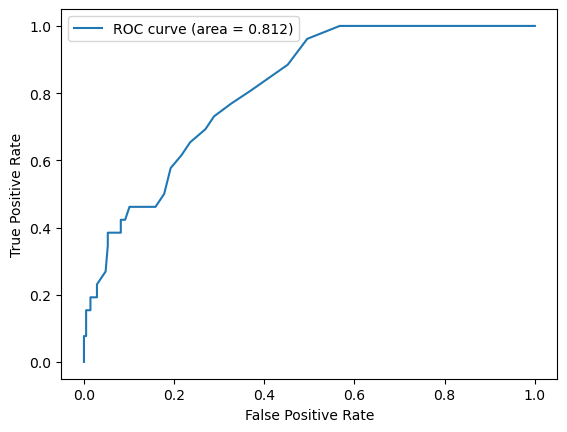

In [12]:
rf_cvd.roc_plot()

## Case 2: Predict the Immunoglobulin A Nephropathy risk for diabetes patients

In [14]:
from DiabetesComplecationPrediction.datasets import *
from DiabetesComplecationPrediction.preprocessing import *

### Load the data

In [15]:
df_igan = diabetes_IgAN_risk()

In [16]:
df_igan.head()

,Age,Sex,Body height at 0M,Waist circumstances at 0M,Duration of T2DM,Smoking habit,Drinking habit,History of complications,History of hypertension,History of dyslipidemia,History of hyperuricemia,History of retinopathy,History of arteriosclerosis obliterans,History of atrial fibrillation,History of kidney disease,History of liver disease,History of myocardial infarction,History of cerebral infarction,History of angina pectoris,History of heart failure,Systolic blood pressure at 0M,Systolic blood pressure at 1M,Systolic blood pressure at 3M,Systolic blood pressure at 12M,Diastolic blood pressure at 0M,Diastolic blood pressure at 1M,Diastolic blood pressure at 3M,Diastolic blood pressure at 12M,Pulse rate at 0M,Pulse rate at 1M,Pulse rate at 3M,Pulse rate at 12M,Body weight at 0M,Body weight at 1M,Body weight at 3M,Body weight at 12M,BMI at 0M,BMI at 1M,BMI at 3M,BMI at 12M,...,BUN at 0M,BUN at 1M,BUN at 3M,BUN at 12M,Uric acid at 0M,Uric acid at 1M,Uric acid at 3M,Uric acid at 12M,Creatinine at 0M,Creatinine at 1M,Creatinine at 3M,Creatinine at 12M,Na at 0M,Na at 1M,Na at 3M,Na at 12M,Cl at 0M,Cl at 1M,Cl at 3M,Cl at 12M,K at 0M,K at 1M,K at 3M,K at 12M,Urinary protein at 0M,Urinary protein at 1M,Urinary protein at 3M,Urinary protein at 12M,Urinary sugar at 0M,Urinary sugar at 1M,Urinary sugar at 3M,Urinary sugar at 12M,Urinary albumin/creatinine ratio at 0M,Urinary albumin/creatinine ratio at 3M,Urinary albumin/creatinine ratio at 12M,eGFR at 0M,eGFR at 1M,eGFR at 3M,eGFR at 12M,Risk of Nephropathy
0,61.0,1.0,170.0,101.0,72.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,144.0,159.0,143.0,131.0,76.0,82.0,77.0,78.0,107.0,NaN,91.0,109.0,84.5,82.0,78.0,74.0,29.238754,28.373702,26.989619,25.605536,...,13.1,14.3,10.6,18.2,5.0,6.7,6.3,7.4,1.06,1.12,1.16,0.97,135.0,138.0,139.0,140.0,100.0,103.0,104.0,102.0,5.2,5.1,5.1,5.4,2.0,2.0,NaN,1.0,2.0,0.0,NaN,0.0,53.3,NaN,6.4,55.940643,52.670513,50.686818,61.643003,0.0
1,42.0,1.0,184.0,NaN,36.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,128.0,110.0,NaN,80.0,80.0,70.0,NaN,NaN,NaN,NaN,NaN,105.0,103.0,105.0,NaN,31.013705,30.422968,31.013705,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,64.0,1.0,169.0,NaN,168.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,124.0,124.0,128.0,NaN,75.0,70.0,70.0,NaN,NaN,NaN,NaN,NaN,81.8,83.2,81.6,NaN,28.640454,29.130633,28.570428,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,57.0,1.0,168.5,NaN,144.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,148.0,160.0,138.0,128.0,80.0,88.0,80.0,78.0,NaN,NaN,NaN,NaN,91.2,91.0,91.8,83.9,32.121442,32.051000,32.332767,29.550317,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,63.0,2.0,151.0,88.5,72.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140.0,122.0,138.0,128.0,70.0,70.0,80.0,70.0,73.0,72.0,78.0,78.0,56.7,56.1,56.3,55.4,24.867330,24.604184,24.691899,24.297180,...,NaN,12.6,15.6,15.7,NaN,5.7,6.4,6.6,0.59,0.53,0.52,0.55,NaN,140.0,136.0,136.0,NaN,102.0,100.0,100.0,4.2,5.1,4.5,5.6,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,30.0,27.1,56.6,77.754106,87.433453,89.274571,83.961202,1.0


In [17]:
df_igan.isnull().sum()

Age                             1
Sex                             1
Body height  at 0M             14
Waist circumstances at 0M     312
Duration of T2DM               66
                             ... 
eGFR at 0M                     89
eGFR at 1M                    136
eGFR at 3M                    135
eGFR at 12M                   155
Risk of Nephropathy             1
Length: 165, dtype: int64

### Check the missing rate

In [18]:
del_feature = Del_Feature()

In [20]:
igan_missing = del_feature.missing_rate(df_igan)
igan_missing

,missing_rate
Proinsulin/Insulin at 12M,78.305520
Insulin at 12M.1,77.920411
CPI at 12M,77.920411
Proinsulin at 12M,77.920411
C-peptide at 12M,77.792041
...,...
History of hyperuricemia,0.128370
History of dyslipidemia,0.128370
History of hypertension,0.128370
History of complications,0.128370


### Plot the missing rate histogram

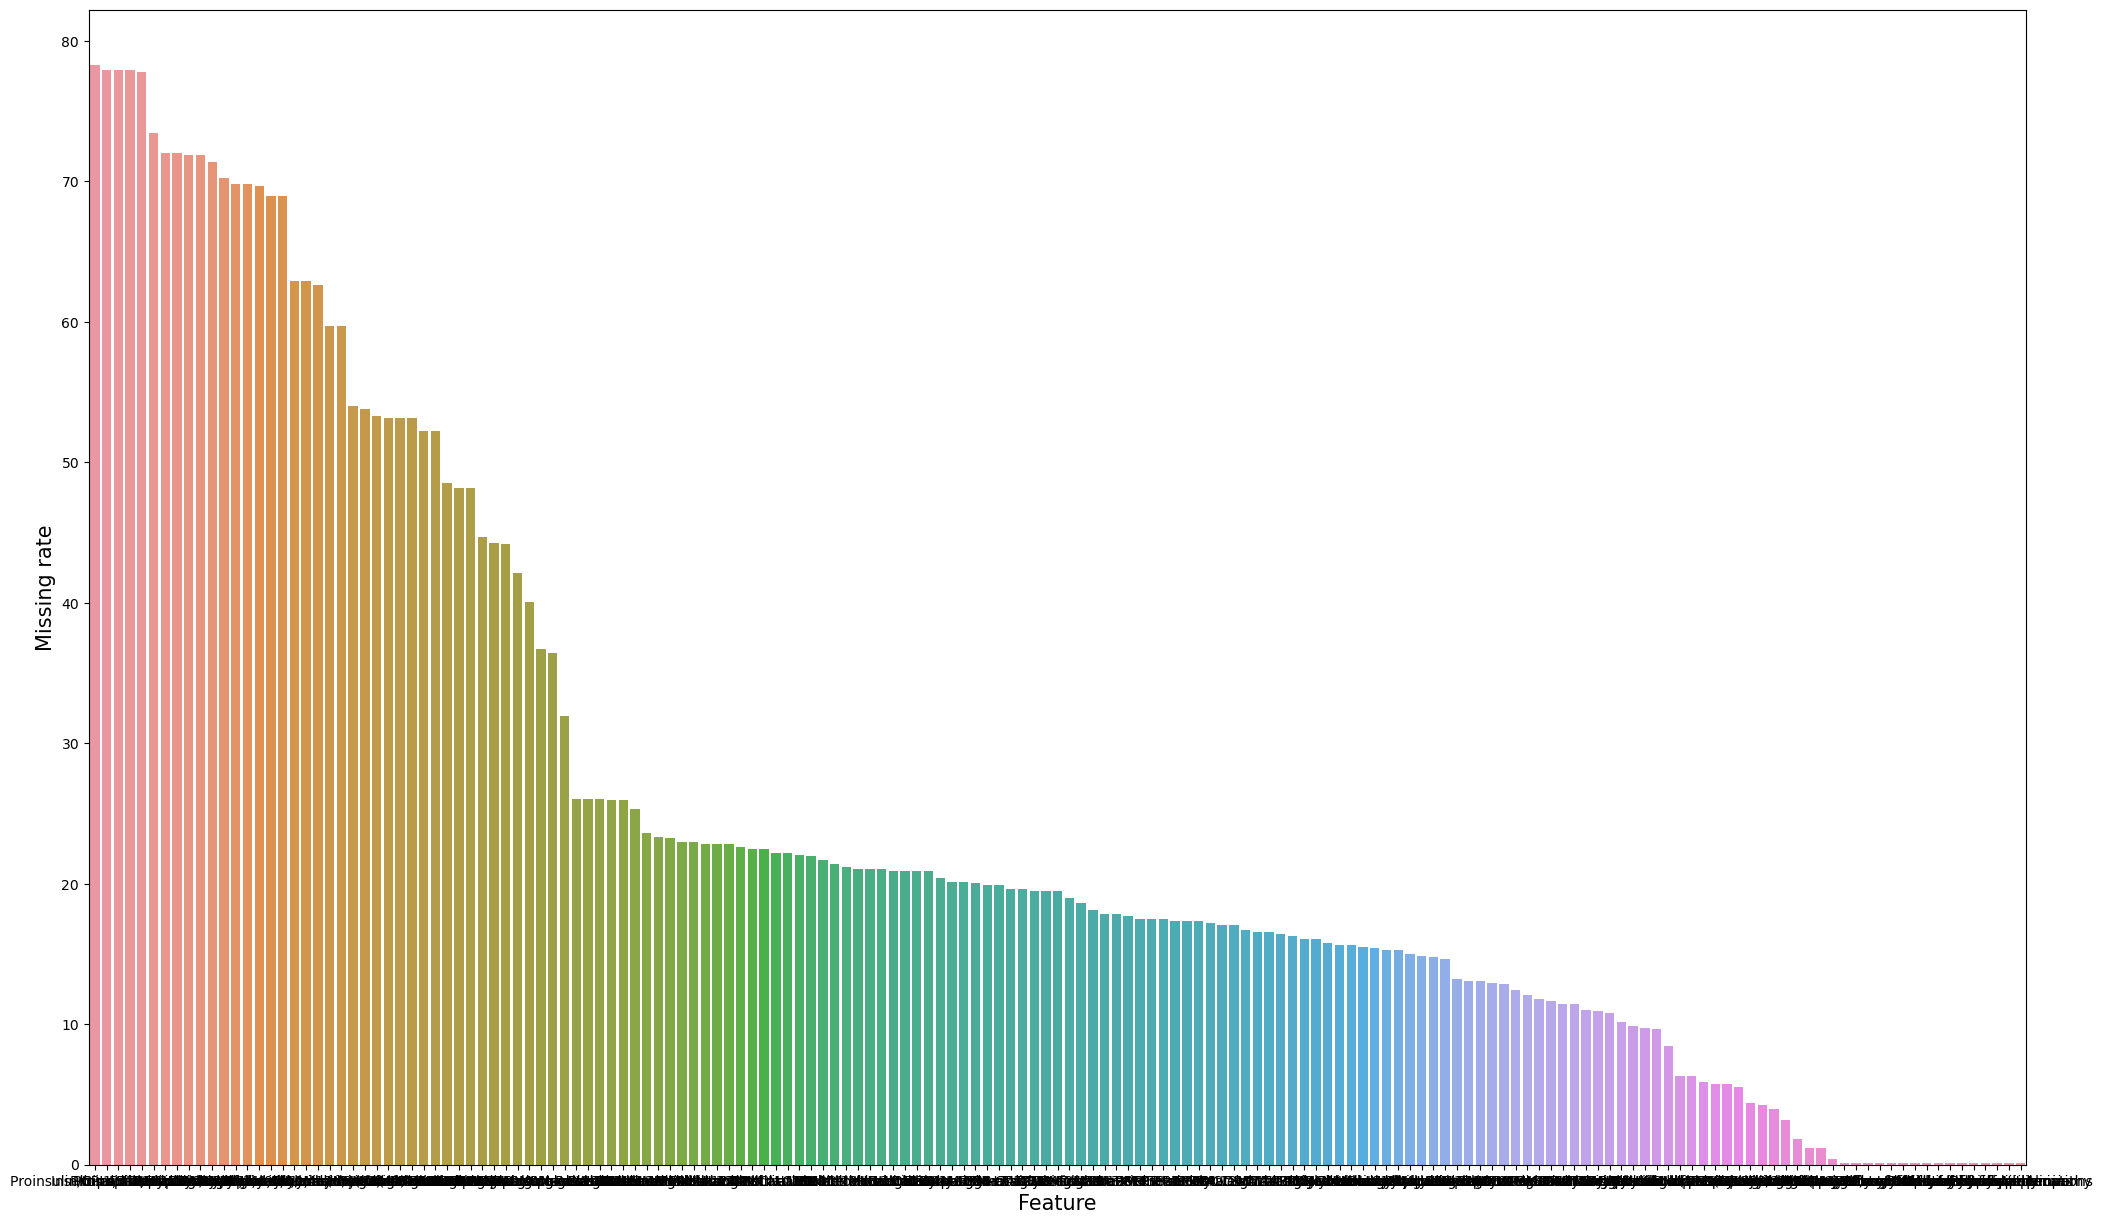

In [21]:
del_feature.missing_rate_hist(df_igan)

### Delete features with missing rate high than 30%

In [22]:
df_igan = del_feature.del_feature(df_igan, igan_missing)

In [23]:
df_igan.isnull().sum()

Age                      1
Sex                      1
Body height  at 0M      14
Duration of T2DM        66
Smoking habit           31
                      ... 
eGFR at 0M              89
eGFR at 1M             136
eGFR at 3M             135
eGFR at 12M            155
Risk of Nephropathy      1
Length: 124, dtype: int64

In [24]:
df_igan = df_igan[df_igan['Risk of Nephropathy'].notnull()]

### Inpute the rest missing values with mean

In [25]:
df_igan = normal_impute(df_igan)

In [27]:
df_igan.isnull().sum()

Age                    0
Sex                    0
Body height  at 0M     0
Duration of T2DM       0
Smoking habit          0
                      ..
eGFR at 0M             0
eGFR at 1M             0
eGFR at 3M             0
eGFR at 12M            0
Risk of Nephropathy    0
Length: 124, dtype: int64